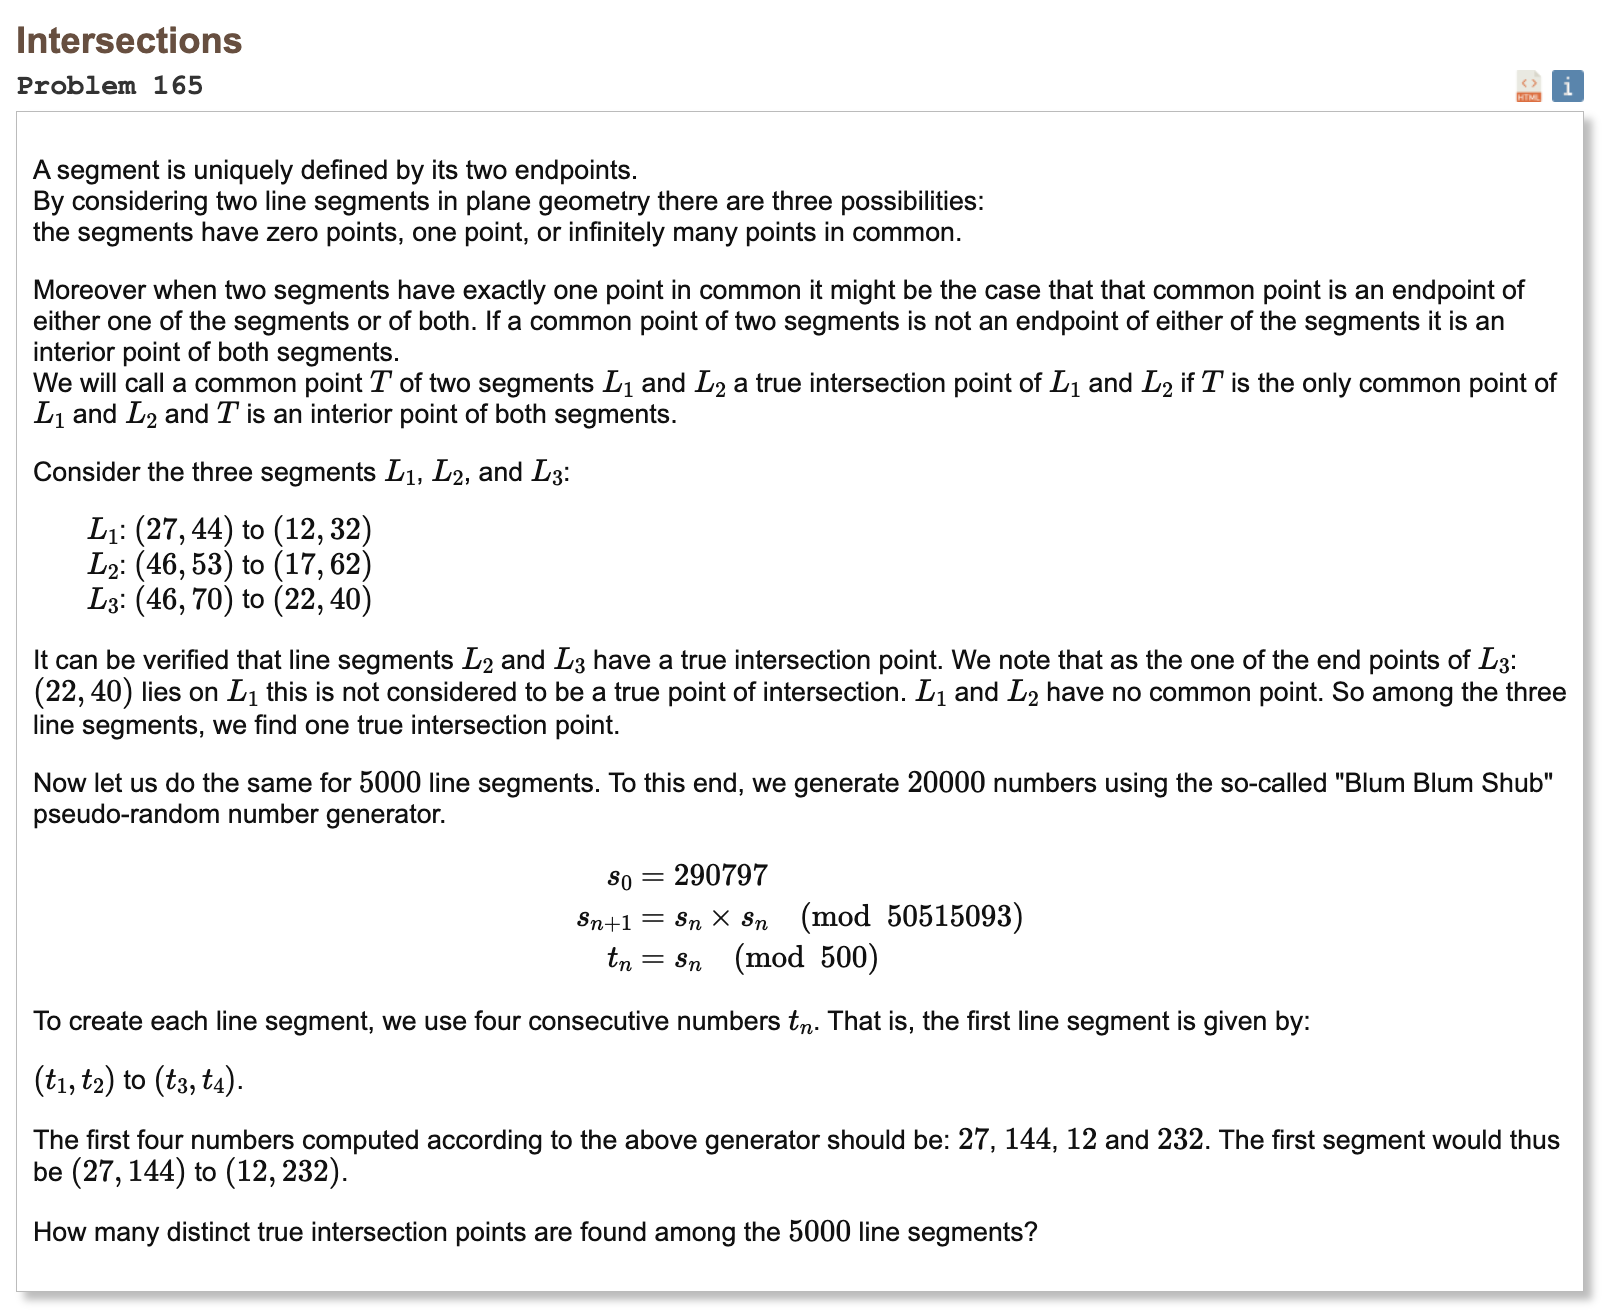

## Initial approach

* generate 5000 segments from blum blum shub with coordinates in 0..499
* count only true intersections strictly inside both segments not at endpoints
* use orientation tests to accept pairs where each segment properly crosses the other
* compute exact intersection as rationals via determinants to avoid floating errors
* store each point canonically as a reduced integer tuple so duplicates collapse
* use math.gcd for reduction and fractions library is not needed
* iterate all pairs with quick bounding box and sign checks to prune most cases
* answer is the size of the set of distinct intersection tuples

In [1]:
%%time

import math

def gen_vals(k):
    s, mod = 290797, 50515093
    for _ in range(k):
        s = s * s % mod
        yield s % 500

def cross(ax, ay, bx, by): return ax * by - ay * bx

def intersect(p1, p2, p3, p4):
    x1,y1=x1_,y1_=p1; x2,y2=p2; x3,y3=p3; x4,y4=p4
    r1x,r1y=x2-x1,y2-y1; r2x,r2y=x4-x3,y4-y3
    c1,c2=cross(r1x,r1y,x3-x1,y3-y1),cross(r1x,r1y,x4-x1,y4-y1)
    if c1*c2>=0: return None
    c3,c4=cross(r2x,r2y,x1-x3,y1-y3),cross(r2x,r2y,x2-x3,y2-y3)
    if c3*c4>=0: return None
    den=cross(r1x,r1y,r2x,r2y)
    t=cross(x3-x1,y3-y1,r2x,r2y)
    xn,yn=x1*den+r1x*t,y1*den+r1y*t
    if den<0: den,xn,yn=-den,-xn,-yn
    g=math.gcd(math.gcd(abs(xn),abs(yn)),den)
    return (xn//g,yn//g,den//g)

vals=list(gen_vals(20000))
segs=[tuple(vals[i:i+4]) for i in range(0,20000,4)]
boxes=[(min(x1,x2),max(x1,x2),min(y1,y2),max(y1,y2)) for x1,y1,x2,y2 in segs]
pts=set()

for i,(x1,y1,x2,y2) in enumerate(segs):
    a1,a2,b1,b2=boxes[i]
    for j in range(i+1,5000):
        c1,c2,d1,d2=boxes[j]
        if a1>c2 or c1>a2 or b1>d2 or d1>b2: continue
        p=intersect((x1,y1),(x2,y2),(segs[j][0],segs[j][1]),(segs[j][2],segs[j][3]))
        if p: pts.add(p)

print("Result:", len(pts))

Result: 2868868
CPU times: user 6.6 s, sys: 105 ms, total: 6.71 s
Wall time: 6.72 s
